In [1]:
#Import libraries
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

In [2]:
#Import data
uso= pd.read_csv('data/uso_merged.csv')

In [3]:
#Adjust dataframe for graph #1
color_map = {'Democratic': 'blue', 'Republican': 'red'}
# Add a 'Color' column to the dataframe based on the 'Party' column
uso['Color']= uso['Party'].map(color_map)
uso

,Unnamed: 0,President,Party,Year of Drug Seizure,Years In Office,Drug,KG Equivalent,Color
0,0,James (Jimmy) Carter,Democratic,1980,1977-1981,Heroin,229.970993,blue
1,1,James (Jimmy) Carter,Democratic,1980,1977-1981,Opium,20.000000,blue
2,2,James (Jimmy) Carter,Democratic,1981,1977-1981,Heroin,151.000000,blue
3,3,James (Jimmy) Carter,Democratic,1981,1977-1981,Opium,69.000000,blue
4,4,Ronald Reagan,Republican,1982,1981-1989,Heroin,275.985992,red
...,...,...,...,...,...,...,...,...
248,248,Donald Trump,Republican,2019,2017-2021,Opium,1122.165000,red
249,249,Donald Trump,Republican,2019,2017-2021,Heroin,0.367800,red
250,250,Donald Trump,Republican,2019,2017-2021,Pharmaceutical opioids,840.456000,red
251,251,Donald Trump,Republican,2019,2017-2021,Illicit morphine,0.695500,red


In [4]:
#Sum of KG column by president
KG_summed = uso.groupby(['President', 'Party', 'Color'])['KG Equivalent'].sum().reset_index()
KG_summed

,President,Party,Color,KG Equivalent
0,Barack Obama,Democratic,blue,115894.150856
1,Donald Trump,Republican,red,26780.535461
2,George H.W. Bush,Republican,red,7033.976473
3,George W. Bush,Republican,red,51986.130110
4,James (Jimmy) Carter,Democratic,blue,469.970993
5,Ronald Reagan,Republican,red,4252.125530
6,William (Bill) Clinton,Democratic,blue,14232.967412


In [5]:
#To ensure graph shows the correct years
grp = uso.groupby(['Years In Office','President'])
grp.head()

,Unnamed: 0,President,Party,Year of Drug Seizure,Years In Office,Drug,KG Equivalent,Color
0,0,James (Jimmy) Carter,Democratic,1980,1977-1981,Heroin,229.970993,blue
1,1,James (Jimmy) Carter,Democratic,1980,1977-1981,Opium,20.000000,blue
2,2,James (Jimmy) Carter,Democratic,1981,1977-1981,Heroin,151.000000,blue
3,3,James (Jimmy) Carter,Democratic,1981,1977-1981,Opium,69.000000,blue
4,4,Ronald Reagan,Republican,1982,1981-1989,Heroin,275.985992,red
5,5,Ronald Reagan,Republican,1982,1981-1989,Illicit morphine,0.033000,red
6,6,Ronald Reagan,Republican,1982,1981-1989,Opium,120.000000,red
7,7,Ronald Reagan,Republican,1983,1981-1989,Heroin,300.372009,red
8,8,Ronald Reagan,Republican,1983,1981-1989,Opium,16.087000,red
26,26,George H.W. Bush,Republican,1990,1989-1993,Other illicit opioids,2.249400,red


In [6]:
grp.Color.max().values

array(['blue', 'red', 'red', 'blue', 'red', 'blue', 'red'], dtype=object)

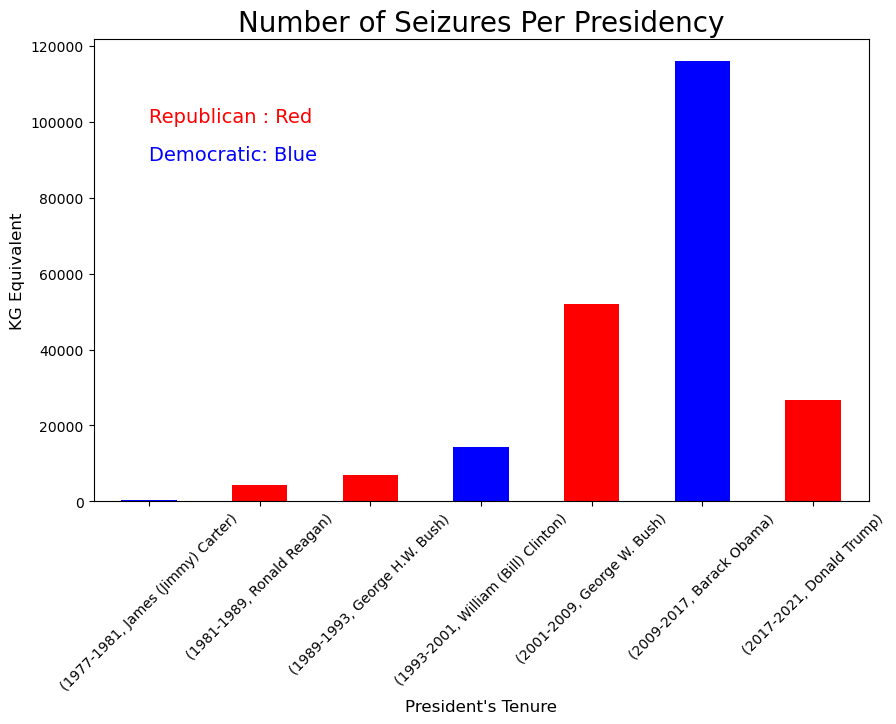

In [12]:
#Sum of KG column by president
grp['KG Equivalent'].sum().plot.bar(color=grp.Color.max().values, figsize=[10,6],rot=45)
plt.annotate('Republican : Red', [0,100000], color='r', fontsize= 14)
plt.annotate('Democratic: Blue', [0,90000], color='b', fontsize=14)
plt.title('Number of Seizures Per Presidency', fontsize=20)
plt.ylabel('KG Equivalent', fontsize=12)
plt.xlabel("President's Tenure", fontsize=12)
plt.savefig('USO_graphs/seizure_president.png', bbox_inches='tight')
plt.show()

In [86]:
uso['KG Equivalent'].max()

38351.65

In [87]:
uso['KG Equivalent'].min()

0.0004

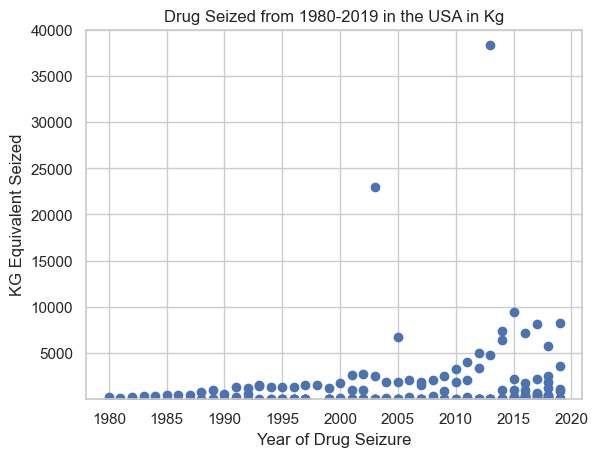

In [101]:
#Scatter Plot
plt.scatter(uso['Year of Drug Seizure'],uso['KG Equivalent'])
plt.title('Drug Seized from 1980-2019 in the USA in Kg')
plt.ylim(0.0004,40000)
plt.xlabel('Year of Drug Seizure')
plt.ylabel('KG Equivalent Seized')
plt.grid(True)
plt.savefig('USO_graphs/seizure_plotted.png')
plt.show()

/Users/michelleminkowitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michelleminkowitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michelleminkowitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michelleminkowitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

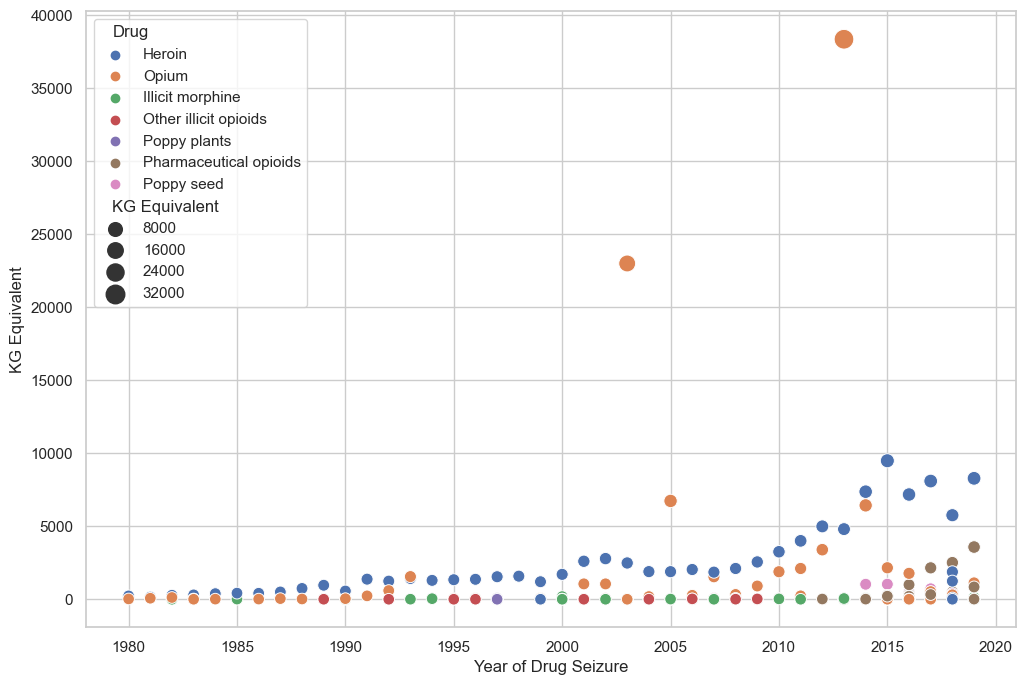

In [118]:

# Draw a scatter plot while assigning point colors and sizes to different variables in the dataset
plt.figure(figsize=(12, 8))
plt.title('Drugs Seized from 1980-2019 in the USA')
ax = sns.scatterplot(x='Year of Drug Seizure', y='KG Equivalent',
                     hue='Drug', size='KG Equivalent',
                     sizes=(70, 200),
                     data=uso)
min_kg = uso['KG Equivalent'].min()
max_kg = uso['KG Equivalent'].max()
plt.savefig('USO_graphs/seizure_by_drug_plotted.png')
plt.show()